In [138]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata as ad

In [177]:
    adata = sc.read_h5ad('/home/zengzw/HRA000477_results/count/Tumor/tumor_clustering.h5ad')
    adata.obs['barcode'] = [i[:16] for i in adata.obs.index]
    adata.obs['cdr3'] = '/'
    adata.obs['cdr3_nt'] = '/'
    num_duplicates = adata.obs['barcode'].duplicated().sum()
    print(f"Number of duplicate barcodes in h5ad: {num_duplicates}")

Number of duplicate barcodes in h5ad: 1632


In [176]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,discard,True,batch,leiden,louvain,cell_type,barcode,cdr3,cdr3_nt
AAACCTGAGAAGGCCT-1-TNBC01,1149,2093.0,26.0,1.242236,True,2093.0,TNBC01,7,8,NK cell,AAACCTGAGAAGGCCT,/,/
AAACCTGCAACACCCG-1-TNBC01,1821,4384.0,110.0,2.509124,True,4384.0,TNBC01,23,21,other,AAACCTGCAACACCCG,/,/
AAACCTGCAAGCTGGA-1-TNBC01,1806,3833.0,26.0,0.678320,True,3833.0,TNBC01,12,1,T cell,AAACCTGCAAGCTGGA,/,/
AAACCTGCAATGAAAC-1-TNBC01,1565,2936.0,6.0,0.204360,True,2936.0,TNBC01,7,8,NK cell,AAACCTGCAATGAAAC,/,/
AAACCTGCACCAACCG-1-TNBC01,1247,2277.0,30.0,1.317523,True,2277.0,TNBC01,7,8,NK cell,AAACCTGCACCAACCG,/,/
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTTATGTGC-1-HER2BC010,1513,3119.0,47.0,1.506893,True,3119.0,HER2BC010,1,1,T cell,TTTGTCAGTTATGTGC,/,/
TTTGTCATCAAGCCTA-1-HER2BC010,2255,5087.0,248.0,4.875172,True,5087.0,HER2BC010,0,0,B cell,TTTGTCATCAAGCCTA,/,/
TTTGTCATCAGCTCGG-1-HER2BC010,1985,6583.0,222.0,3.372323,True,6583.0,HER2BC010,6,2,Endo,TTTGTCATCAGCTCGG,/,/
TTTGTCATCCTTAATC-1-HER2BC010,1384,2546.0,23.0,0.903378,True,2546.0,HER2BC010,1,1,T cell,TTTGTCATCCTTAATC,/,/


In [139]:
    # input settings
    # annoatatiob results
    h5ad_file = '/home/zengzw/HRA000477_results/count/Tumor/tumor_clustering.h5ad'
    # TURST4 output
    csv_files = {'TNBC1':'/home/zengzw/prog/man/OV/TRUST_HRR649388_r2_report.tsv'}
    
    # Output h5ad settings
    path = '/home/zengzw/prog/processed_data/HRA000477-test/'  # User define
    file_name = 'HRA000477-tumor-test'

In [145]:
    # 加载 h5ad 文件
    adata = sc.read_h5ad(h5ad_file)
    adata.obs['barcode'] = [i[:16] for i in adata.obs.index]
    adata.obs['cdr3'] = pd.NA
    adata.obs['cdr3_nt'] = pd.NA
    
    match = {}
    
    for name, csv_file in csv_files:
        # 加载 csv 文件
        csv_data = pd.read_csv(csv_file, sep='\t')  # 假设用'\t'分隔
        csv_data['barcode'] = [i[:16] for i in csv_data['cid']]
        
        mask_batch = adata.obs['batch'] == name
        num_duplicates = adata.obs.loc[mask_batch, 'barcode'].duplicated().sum()
        print(f"Number of duplicate barcodes in h5ad: {num_duplicates} for batch {name})")
        assert(num_duplicates == 0)
        

        # 计算'barcode'列中重复值的数量
        num_duplicates = csv_data['barcode'].duplicated().sum()
        print(f"Number of duplicate barcodes in TRUST: {num_duplicates}")

        add = 0
        match_list = []
        # 遍历csv_data中的每一行
        for _, row in csv_data.iterrows():
            # 查找adata.obs中barcode和batch与csv_data匹配的行
            mask = ((adata.obs['barcode'] == (row['barcode'])) & (adata.obs['batch'] == name))

            # 如果找到匹配的行，更新cdr3和cdr3_nt
            if mask.any():
                #print(adata.obs.loc[mask]['cdr3'].item())
                if(pd.isna(adata.obs.loc[mask]['cdr3'].item())):
                    adata.obs.loc[mask, 'cdr3'] = row['CDR3aa']
                    adata.obs.loc[mask, 'cdr3_nt'] = row['CDR3nt']
                    adata.obs.loc[mask, 'V_gene'] = row['V']
                    adata.obs.loc[mask, 'D_gene'] = row['D']
                    adata.obs.loc[mask, 'J_gene'] = row['J']
                    adata.obs.loc[mask, 'C_gene'] = row['C']
                    for item in adata.obs.loc[mask].index:
                        match_list.append(item)
                else:
                    add += 1
                    # 复制第一行的obs信息
                    first_row_copy = adata.obs.loc[mask].copy()
                    first_row_copy['cdr3'] = row['CDR3aa']
                    first_row_copy['cdr3_nt'] = row['CDR3nt']
                    first_row_copy['V_gene'] = row['V']
                    first_row_copy['D_gene'] = row['D']
                    first_row_copy['J_gene'] = row['J']
                    first_row_copy['C_gene'] = row['C']
                    first_row_copy['batch'] = first_row_copy['batch'] + "-copy"
                    
                    # 生成新的X行（数据），这里假设全零，形状与adata的变量数相同
                    new_data_row = adata.X[mask]

                    # 将新的obs行和新的X行添加到adata
                    # 由于直接添加可能引起问题，我们创建一个新的AnnData对象
                    new_obs = pd.concat([adata.obs, first_row_copy], ignore_index=True)
                    new_X = np.vstack([adata.X, new_data_row])

                    # 创建一个新的AnnData对象
                    new_adata = ad.AnnData(X=new_X, obs=new_obs, var=adata.var)
                    adata = new_adata
    
        match[csv_file] = match_list
        print(f'{csv_file}: {len(set(match_list))} lines matched!')
        print(f'{csv_file}: {add} lines added!')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/zengzw/HRR649388_clustering/figures/figures/clustering.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
adata.obs.loc[adata.obs['cell_type'] == 'B cell']

In [142]:
adata.write_h5ad(path+file_name+'.h5ad')

In [143]:
# 检查'gene'列以"IG"开头的所有行，同时确保排除任何NA/NaN值
mask = adata.obs['V_gene'].notna() & adata.obs['V_gene'].str.startswith('IG')
# 将这些行的'cell_type'列改为"B cell"
adata.obs.loc[mask, 'cell_type'] = 'B cell'

In [144]:
adata.write_h5ad(path+file_name+'modified'+'.h5ad')

In [155]:
from typing import List

def merge(
    # input settings
    # annoatatiob results
    h5ad_file:str,
    # TURST4 output
    csv_files:List[str],
    
    # Output h5ad settings
    path:str,   # User define
    file_name:str,
):
    # 加载 h5ad 文件
    adata = sc.read_h5ad(h5ad_file)
    adata.obs['barcode'] = [i[:16] for i in adata.obs.index]
    adata.obs['cdr3'] = '/'
    adata.obs['cdr3_nt'] = '/'
    num_duplicates = adata.obs['barcode'].duplicated().sum()
    print(f"Number of duplicate barcodes in h5ad: {num_duplicates}")
    match = {}
    
    for csv_file in csv_files:
        # 加载 csv 文件
        csv_data = pd.read_csv(csv_file, sep='\t')  # 假设用'\t'分隔
        csv_data['barcode'] = [i[:16] for i in csv_data['cid']]

        # 计算'barcode'列中重复值的数量
        num_duplicates = csv_data['barcode'].duplicated().sum()
        print(f"Number of duplicate barcodes in TRUST: {num_duplicates}")

        add = 0
        match_list = []
        # 遍历csv_data中的每一行
        for _, row in csv_data.iterrows():
            # 查找adata.obs中barcode和batch与csv_data匹配的行
            mask = adata.obs['barcode'] == (row['barcode'])

            # 如果找到匹配的行，更新cdr3和cdr3_nt
            if mask.any():
                #print(adata.obs.loc[mask]['cdr3'].item())
                if(adata.obs.loc[mask]['cdr3'].item() == '/'):
                    adata.obs.loc[mask, 'cdr3'] = row['CDR3aa']
                    adata.obs.loc[mask, 'cdr3_nt'] = row['CDR3nt']
                    adata.obs.loc[mask, 'V_gene'] = row['V']
                    for item in adata.obs.loc[mask].index:
                        match_list.append(item)
                else:
                    add += 1
                    # 复制第一行的obs信息
                    first_row_copy = adata.obs.loc[mask].copy()
                    first_row_copy['cdr3'] = row['CDR3aa']
                    first_row_copy['cdr3_nt'] = row['CDR3nt']
                    first_row_copy['V_gene'] = row['V']
                    first_row_copy['batch'] = row['batch']+"-copy"

                    # 生成新的X行（数据），这里假设全零，形状与adata的变量数相同
                    new_data_row = adata.X[mask]

                    # 将新的obs行和新的X行添加到adata
                    # 由于直接添加可能引起问题，我们创建一个新的AnnData对象
                    new_obs = pd.concat([adata.obs, first_row_copy], ignore_index=True)
                    new_X = np.vstack([adata.X, new_data_row])

                    # 创建一个新的AnnData对象
                    new_adata = ad.AnnData(X=new_X, obs=new_obs, var=adata.var)
                    adata = new_adata
    
        match[csv_file] = match_list
        print(f'{csv_file}: {len(set(match_list))} lines matched!')
        print(f'{csv_file}: {add} lines added!')
    
    adata.write_h5ad(path+file_name+'.h5ad')
    # 检查'gene'列以"IG"开头的所有行，同时确保排除任何NA/NaN值
    mask = adata.obs['V_gene'].notna() & adata.obs['V_gene'].str.startswith('IG')
    # 将这些行的'cell_type'列改为"B cell"
    adata.obs.loc[mask, 'cell_type'] = 'B cell'
    adata.write_h5ad(path+file_name+'modified'+'.h5ad')
    adata.file.close()  # 关闭备份文件
    
    return adata,match

In [156]:
merge(h5ad_file = '/home/zengzw/prog/processed_data/OV-test/OV-test_final.h5ad',
    # TURST4 output
    csv_files = ['/home/zengzw/prog/man/OV/TRUST_HRR649388_r2_report.tsv'],
    # Output h5ad settings
    path = '/home/zengzw/prog/processed_data/OV-test-packed/',  # User define
    file_name = 'OV-test_final')

Number of duplicate barcodes in h5ad: 0
Number of duplicate barcodes in TRUST: 80
/home/zengzw/prog/man/OV/TRUST_HRR649388_r2_report.tsv: 0 lines matched!
/home/zengzw/prog/man/OV/TRUST_HRR649388_r2_report.tsv: 0 lines added!


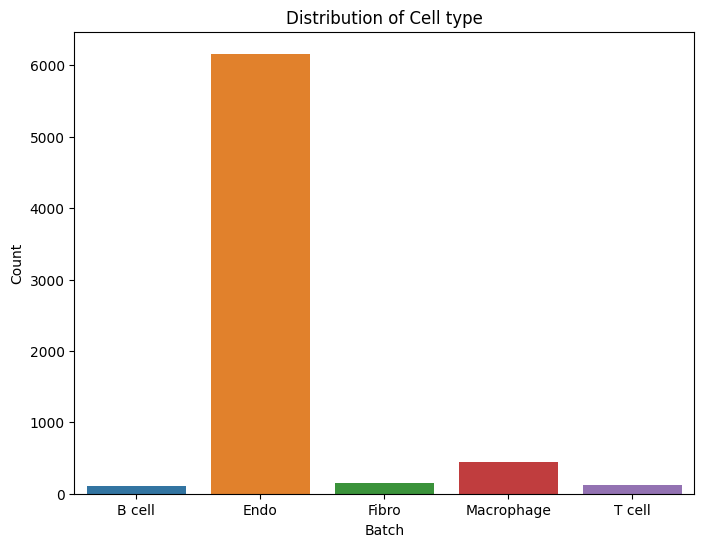

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设adata_filtered是筛选后的AnnData对象
# adata_filtered = ...

# 绘制batch列值的分布
plt.figure(figsize=(8, 6))
sns.countplot(x=adata.obs['cell_type'])
plt.title('Distribution of Cell type')
plt.xlabel('Batch')
plt.ylabel('Count')
plt.show()


In [158]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,discard,True,batch,leiden,louvain,cell_type,barcode,cdr3,cdr3_nt,V_gene
0,2842,9957.0,365.0,3.665763,True,9957.0,HRR649388,2,3,Endo,AAACCTGAGAGACTAT,NaN,NaN,NaN
1,3471,12923.0,640.0,4.952411,True,12923.0,HRR649388,1,1,Endo,AAACCTGAGAGAGCTC,NaN,NaN,NaN
2,3884,14588.0,317.0,2.173019,True,14588.0,HRR649388,3,2,Endo,AAACCTGAGCTCAACT,NaN,NaN,NaN
3,1160,2423.0,22.0,0.907965,True,2423.0,HRR649388,7,7,Macrophage,AAACCTGAGGCCCGTT,NaN,NaN,NaN
4,1795,4592.0,172.0,3.745645,True,4592.0,HRR649388,2,3,Endo,AAACCTGAGGTACTCT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,1339,4959.0,191.0,3.851583,True,4959.0,HRR649388,17,17,B cell,CAAGATCCAGTGGAGT,CAREVPESYSFDKW,TGTGCGCGAGAAGTCCCAGAAAGTTACAGTTTTGACAAATGG,IGHV1-46*01
6993,934,5474.0,82.0,1.497990,True,5474.0,HRR649388,17,17,B cell,AGACGTTAGCGTTTAC,CQEYNTYSPGEGSF,TGCCAAGAATATAATACTTATTCTCCTGGAGAGGGGTCGTTC,IGKV1-5*03
6994,836,4525.0,88.0,1.944751,True,4525.0,HRR649388,17,17,B cell,CTGAAACTCTACGAGT,CANHYLTVTPYYQVDHMDSW,TGTGCGAATCATTATCTCACGGTGACTCCCTATTATCAAGTCGACC...,IGHV3-23*01
6995,659,3969.0,70.0,1.763668,True,3969.0,HRR649388,17,17,B cell,CCAGCGACATGACGGA,CARDNRNFYGSGSYFVGRDWWIDAW,TGTGCGAGAGATAATCGGAACTTCTATGGATCGGGGAGTTATTTTG...,IGHV1-46*01


/home/zengzw/anaconda3/envs/scrna/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


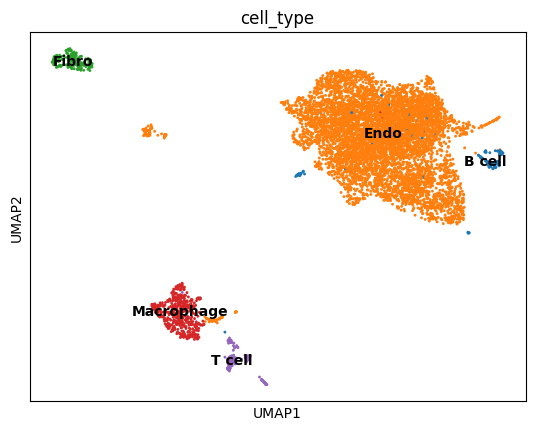

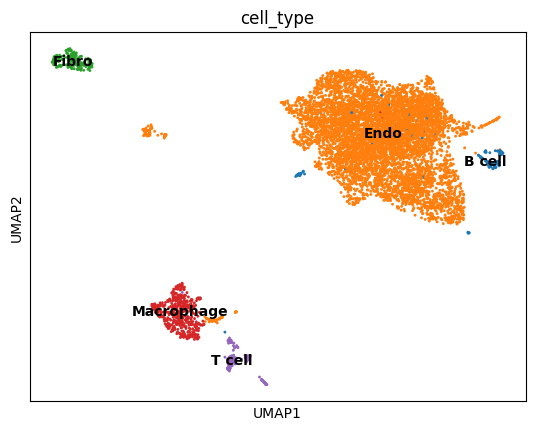

In [171]:
#sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)
sc.pl.umap(adata, color='cell_type', legend_fontsize="medium", wspace=0.15, ncols=2, show=False, return_fig=True, legend_loc='on data')